**Group - 7
Members: Usman Gul, Ghulam Mustafa Rao, Shehla Shireen, Bilal Ahmed**

In [ ]:
import pandas as pd # importing necessary libararies
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/_cafe_sales.csv')# reading the dataset
df.head()# getting the 5 first rows of dataset

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [ ]:
df.shape#to find no. of rows and columns

(10000, 8)

there are 1000 rows and 8 columns

In [ ]:
# examining the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


The above code tells that there are missing values in every column other than Transaction ID

In [ ]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In the above code, we do not have mean, mode or any other statistical rows because the columns are not in numeric format yet. We will typecast it into numeric later in the code.

In [ ]:
# checking for any missing values
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


In [ ]:
#checking the unique elements in each attribute
df.nunique()

,0
Transaction ID,10000
Item,10
Quantity,7
Price Per Unit,8
Total Spent,19
Payment Method,5
Location,4
Transaction Date,367


In [ ]:
# checking for duplicate rows
df.duplicated().sum()

np.int64(0)

There are no dupliacted values. One rationale for it is this because transaction id is unique.

To check error and unknown entries percentages in each column.

In [ ]:
for col in df.columns:
    print(f"\n--- Value counts (%): {col} ---")
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    print(percent.round(2).astype(str) + '%')


--- Value counts (%): Transaction ID ---
Transaction ID
TXN_9226047    0.01%
TXN_8567525    0.01%
TXN_4583012    0.01%
TXN_6796890    0.01%
TXN_9933628    0.01%
               ...  
TXN_3160411    0.01%
TXN_7034554    0.01%
TXN_4271903    0.01%
TXN_4977031    0.01%
TXN_1961373    0.01%
Name: proportion, Length: 10000, dtype: object

--- Value counts (%): Item ---
Item
Juice       11.71%
Coffee      11.65%
Salad       11.48%
Cake        11.39%
Sandwich    11.31%
Smoothie    10.96%
Cookie      10.92%
Tea         10.89%
UNKNOWN      3.44%
NaN          3.33%
ERROR        2.92%
Name: proportion, dtype: object

--- Value counts (%): Quantity ---
Quantity
5          20.13%
2          19.74%
4          18.63%
3          18.49%
1          18.22%
UNKNOWN     1.71%
ERROR        1.7%
NaN         1.38%
Name: proportion, dtype: object

--- Value counts (%): Price Per Unit ---
Price Per Unit
3.0        24.29%
4.0        23.31%
2.0        12.27%
5.0        12.04%
1.0        11.43%
1.5        11.33%
E

Removing unknown and error entries as there percentages are negligible. Please notee we have not removed missing values yet.





In [ ]:
for col in df.columns:
  df = df[~df[col].isin(['UNKNOWN', 'ERROR'])]
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2,4.0,NaN,Cash,NaN,2023-10-20
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


Checking again for unknown and error entries

In [ ]:
for col in df.columns:
      print(f"Unique entries in '{col}': {df[col].unique()}")

Unique entries in 'Transaction ID': ['TXN_1961373' 'TXN_4977031' 'TXN_3160411' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']
Unique entries in 'Item': ['Coffee' 'Cake' 'Smoothie' nan 'Sandwich' 'Salad' 'Cookie' 'Juice' 'Tea']
Unique entries in 'Quantity': ['2' '4' '5' '3' '1' nan]
Unique entries in 'Price Per Unit': ['2.0' '3.0' '4.0' '5.0' '1.0' nan '1.5']
Unique entries in 'Total Spent': ['4.0' '12.0' '20.0' '15.0' '25.0' '8.0' '5.0' '6.0' '16.0' '10.0' '2.0'
 '3.0' nan '1.0' '7.5' '9.0' '1.5' '4.5']
Unique entries in 'Payment Method': ['Credit Card' 'Cash' 'Digital Wallet' nan]
Unique entries in 'Location': ['Takeaway' 'In-store' nan]
Unique entries in 'Transaction Date': ['2023-09-08' '2023-05-16' '2023-06-11' '2023-03-31' '2023-07-28'
 '2023-12-31' '2023-11-07' '2023-05-03' '2023-06-01' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-01-15' '2023-03-30' '2023-12-01'
 '2023-09-18' '2023-06-03' '2023-04-20' '2023-04-10' '2023-03-11'
 '2023-06-02' '2023-08-15' '2023-10-09' '2023-04-2

In [ ]:
df.shape

(7155, 8)

In [ ]:
#typecasting into respective datatype
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('Int64')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
print(df.dtypes)

Transaction ID              object
Item                        object
Quantity                     Int64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


In [ ]:
#Convert Transaction Date Col into dateTime Formate, then convert it into Month and year , for Monthly , Quarterly, Yearly analysis


# Convert 'Transaction Date' to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Create separate 'Month' and 'Year' columns
df['Month'] = df['Transaction Date'].dt.month
df['Year'] = df['Transaction Date'].dt.year
df

#Sort data on base on Month and Year
df_sorted = df.sort_values(by=['Year', 'Month'])

# Display the sorted dataframe
df_sorted
#df_sorted['Year'].isnull().sum()
df_sorted['Month'].isnull().sum()

np.int64(117)

In [ ]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Month,Year
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,9.0,2023.0
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,5.0,2023.0
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,6.0,2023.0
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31,3.0,2023.0
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28,7.0,2023.0


In [ ]:
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').astype('Int64')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
print(df.dtypes)

Transaction ID              object
Item                        object
Quantity                     Int64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
Month                        Int64
Year                         Int64
dtype: object


In [ ]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Month,Year
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,9,2023
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,5,2023
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,6,2023
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31,3,2023
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28,7,2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7155 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    7155 non-null   object        
 1   Item              6896 non-null   object        
 2   Quantity          7055 non-null   Int64         
 3   Price Per Unit    7025 non-null   float64       
 4   Total Spent       7028 non-null   float64       
 5   Payment Method    5208 non-null   object        
 6   Location          4676 non-null   object        
 7   Transaction Date  7038 non-null   datetime64[ns]
 8   Month             7038 non-null   Int64         
 9   Year              7038 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), float64(2), object(4)
memory usage: 893.9+ KB


In [ ]:
#checking for null values percentages
for col in df.columns:
      print(f"Unique entries in '{col}': {df[col].unique()}")

Unique entries in 'Transaction ID': ['TXN_1961373' 'TXN_4977031' 'TXN_3160411' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']
Unique entries in 'Item': ['Coffee' 'Cake' 'Smoothie' nan 'Sandwich' 'Salad' 'Cookie' 'Juice' 'Tea']
Unique entries in 'Quantity': <IntegerArray>
[2, 4, 5, 3, 1, <NA>]
Length: 6, dtype: Int64
Unique entries in 'Price Per Unit': [2.  3.  4.  5.  1.  nan 1.5]
Unique entries in 'Total Spent': [ 4.  12.  20.  15.  25.   8.   5.   6.  16.  10.   2.   3.   nan  1.
  7.5  9.   1.5  4.5]
Unique entries in 'Payment Method': ['Credit Card' 'Cash' 'Digital Wallet' nan]
Unique entries in 'Location': ['Takeaway' 'In-store' nan]
Unique entries in 'Transaction Date': <DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-06-11 00:00:00',
 '2023-03-31 00:00:00', '2023-07-28 00:00:00', '2023-12-31 00:00:00',
 '2023-11-07 00:00:00', '2023-05-03 00:00:00', '2023-06-01 00:00:00',
 '2023-11-15 00:00:00',
 ...
 '2023-11-05 00:00:00', '2023-03-17 00:00:00', '2023-03-27 

In [ ]:
null_percent = (df.isnull().sum() / len(df)) * 100

print(null_percent)

Transaction ID       0.000000
Item                 3.619846
Quantity             1.397624
Price Per Unit       1.816911
Total Spent          1.774983
Payment Method      27.211740
Location            34.647100
Transaction Date     1.635220
Month                1.635220
Year                 1.635220
dtype: float64


In [ ]:
for col in df.columns:
    print(f"\n--- Value counts (%): {col} ---")
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    print(percent.round(2).astype(str) + '%')


--- Value counts (%): Transaction ID ---
Transaction ID
TXN_6170729    0.01%
TXN_1961373    0.01%
TXN_4977031    0.01%
TXN_7936002    0.01%
TXN_6120851    0.01%
               ...  
TXN_7619095    0.01%
TXN_2548360    0.01%
TXN_2064365    0.01%
TXN_4717867    0.01%
TXN_2602893    0.01%
Name: proportion, Length: 7155, dtype: object

--- Value counts (%): Item ---
Item
Juice       12.63%
Coffee      12.62%
Salad       12.38%
Sandwich    12.13%
Cake        11.92%
Cookie      11.66%
Tea         11.59%
Smoothie    11.45%
NaN          3.62%
Name: proportion, dtype: object

--- Value counts (%): Quantity ---
Quantity
5       20.73%
2       20.39%
4       19.68%
3       18.98%
1       18.83%
<NA>      1.4%
Name: proportion, dtype: object

--- Value counts (%): Price Per Unit ---
Price Per Unit
3.0    25.06%
4.0    24.07%
2.0    12.82%
5.0    12.69%
1.0    11.81%
1.5    11.74%
NaN     1.82%
Name: proportion, dtype: object

--- Value counts (%): Total Spent ---
Total Spent
6.0     9.92%
12.0   

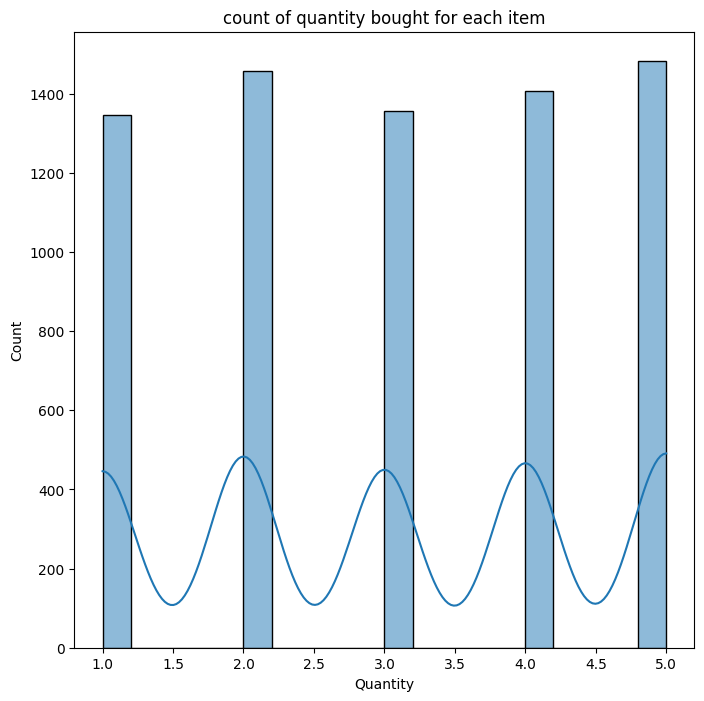

In [ ]:
# to check quantity bought for each item
plt.figure(figsize=(8,8))
plt.title("count of quantity bought for each item")
sns.histplot(data=df, x="Quantity", kde = 3)
plt.show()

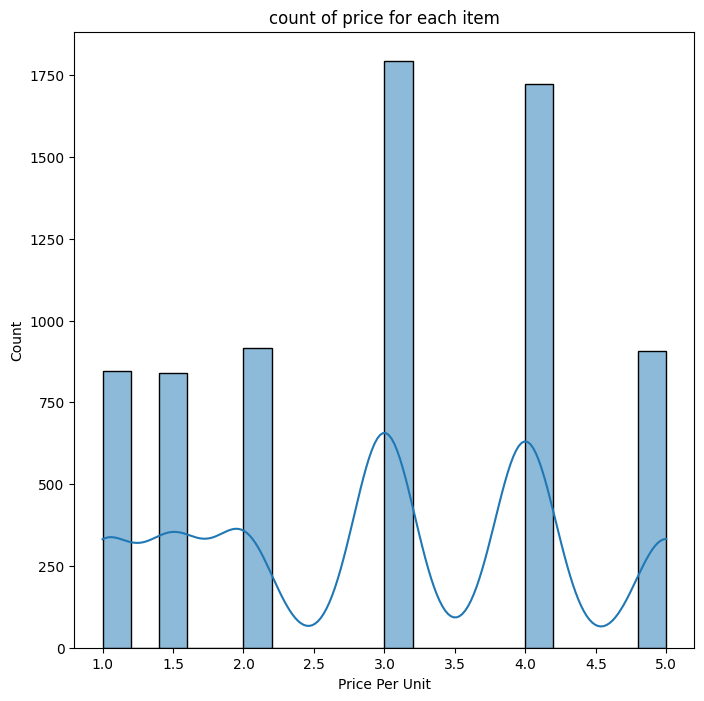

In [ ]:
# to check price for each item
plt.figure(figsize=(8,8))
plt.title("count of price for each item")
sns.histplot(data=df, x="Price Per Unit", kde = 3)
plt.show()

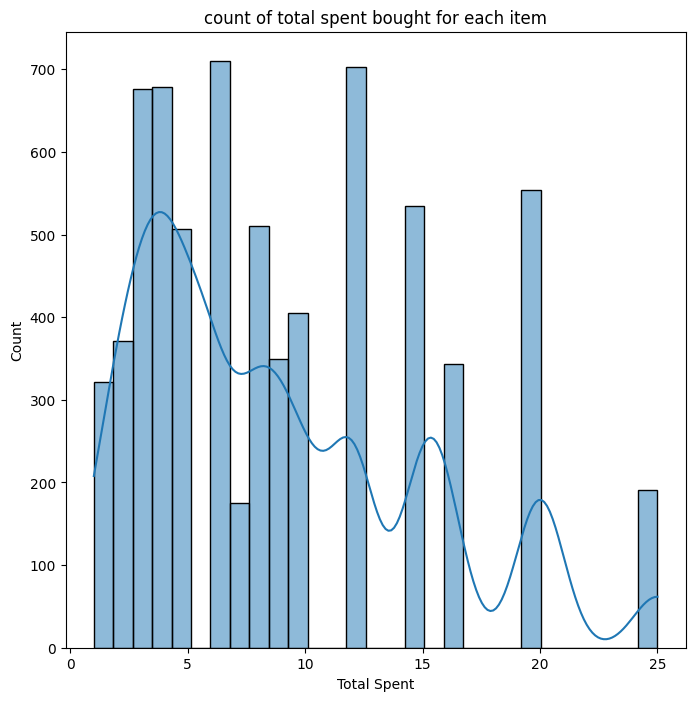

In [ ]:
# to check total spent for each item
plt.figure(figsize=(8,8))
plt.title("count of total spent bought for each item")
sns.histplot(data=df, x="Total Spent", kde = 3)
plt.show()

In [ ]:
mean_score = df['Price Per Unit'].mean()

# Replacing NaNs with the mean
df['Price Per Unit'].fillna(mean_score, inplace=True)



<ipython-input-103-c97c453827b7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price Per Unit'].fillna(mean_score, inplace=True)


In [ ]:
mean_score = df['Total Spent'].mean()

# Replacing NaNs with the mean
df['Total Spent'].fillna(mean_score, inplace=True)

df.head()

<ipython-input-105-fc843af75ece>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Spent'].fillna(mean_score, inplace=True)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Month,Year
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,9,2023
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,5,2023
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,6,2023
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31,3,2023
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28,7,2023


In [ ]:
# One-Hot Encoding for a categorical column
df_encoded = pd.get_dummies(df, columns=['Item'], drop_first=True)

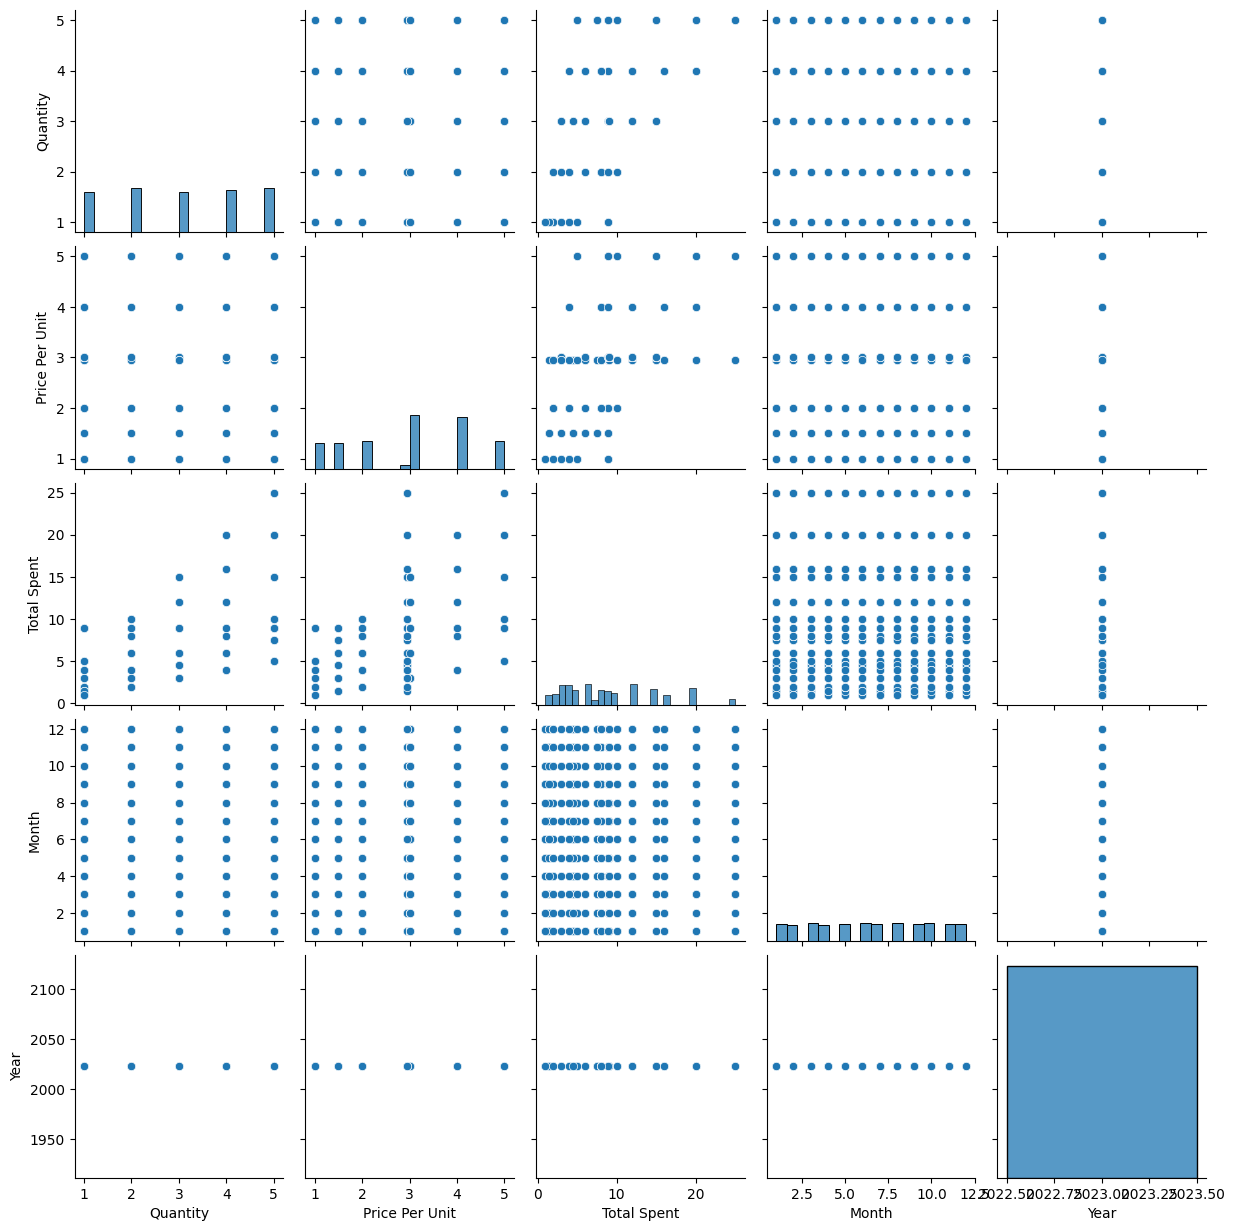

In [ ]:
#Summary of Visualization
sns.pairplot(df)

Number of outliers: 191
     Total Spent
10          25.0
96          25.0
100         25.0
150         25.0
157         25.0


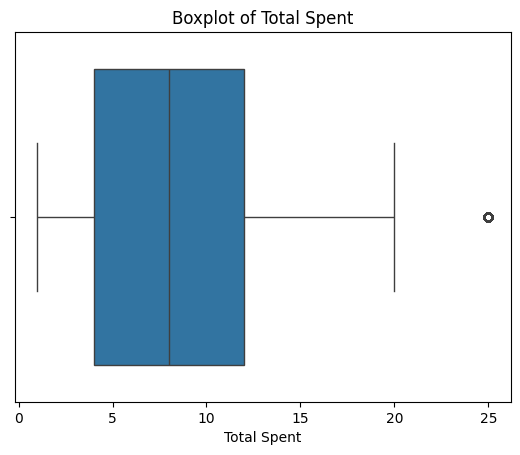

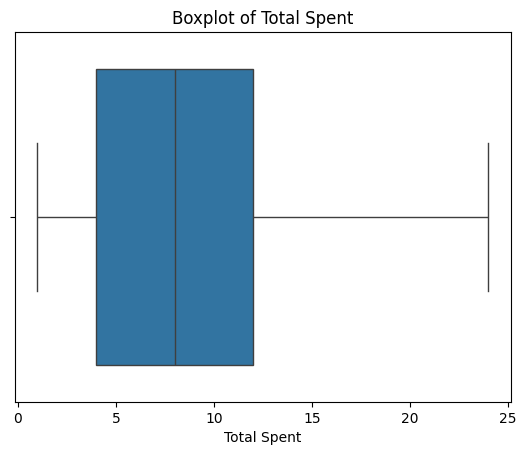

In [ ]:
# Calculate IQR
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier condition
outliers = df[(df['Total Spent'] < (Q1 - 1.5 * IQR)) | (df['Total Spent'] > (Q3 + 1.5 * IQR))]
print("Number of outliers:", outliers.shape[0])
print(outliers[['Total Spent']].head())
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Total Spent'])
plt.title("Boxplot of Total Spent")
plt.show()
#since we have only 1 outlier, do cappng
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Total Spent'] = df['Total Spent'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(x=df['Total Spent'])
plt.title("Boxplot of Total Spent")
plt.show()